**Loading datasets and libraries**

In [131]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [132]:
# Load train.csv
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,<p>😅The pH value observed is: 0.2644088544860...,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,<p>😇The solution's pH level is 0.012034498894...,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,<br>😀The pH reading measures 0.491167423175516...,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,<h1>😅The water sample's pH level is 0.4865531...,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,<p>😍The observed pH value of 0.07548804288855...,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [133]:
# Load submission.csv
submission_df = pd.read_csv('/content/sample_submission.csv')
submission_df.head()

,Index,Potability
0,10000,0.968306
1,10001,0.902692
2,10002,0.813035
3,10003,0.720971
4,10004,1.028595


In [134]:
# Load test.csv
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,10000,<br>😒The observed pH value of 0.4583260930518...,<h1>😁The observed water hardness of 1.7903445...,<p>😁Observing a solids concentration of 1.573...,1.540880,1.659576,2.156778,1.665096,2.105437,<br>😅The turbidity of the water is measured at...
1,10001,<br>😀The pH value observed is: 0.006163832801...,<p>😁The observed water hardness of 2.37971669...,<h1>😒The total solids content in the sample is...,1.225821,1.320635,2.251759,1.333259,1.480757,<p>😅The water sample exhibits a turbidity read...
2,10002,<h2>😀The pH reading measures 0.682188913921691...,<h2>😇The observed water hardness of 1.4080275...,<p>😍The total solids content in the sample is ...,2.430112,1.178618,1.614353,0.890702,1.824291,<br>😀Observing a turbidity value of 1.11871445...
3,10003,<p>😀The observed pH value of 0.56282397372454...,<br>😀The observed water hardness of 1.8369703...,<h1>😍The total solids content in the sample is...,1.910825,2.731592,1.626107,0.711949,2.598104,<br>😍The turbidity of the water is measured at...
4,10004,<h1>😇The pH reading measures 0.336142283595807...,<h1>😀The water hardness is measured at 1.5104...,<br>😀Observing a solids concentration of 2.33...,1.940168,1.269851,1.832447,0.947763,1.052021,<h1>😁The water sample exhibits a turbidity rea...


In [135]:
# Find statistics of training set
train_df.describe()

,Index,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Potability
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,1.577655,1.846947,2.106003,1.253408,1.774500,0.964083
std,2886.89568,0.455594,0.534522,0.605440,0.360951,0.516305,0.280262
min,0.00000,0.771551,0.852042,0.960479,0.554247,0.782468,0.367202
25%,2499.75000,1.195690,1.404213,1.608786,0.953677,1.358345,0.756679
50%,4999.50000,1.516832,1.774148,2.024260,1.204477,1.700410,0.924841
75%,7499.25000,1.919671,2.238055,2.537743,1.512738,2.132153,1.132913
max,9999.00000,2.974793,3.649794,4.153664,2.507518,3.795695,2.219079


In [136]:
#Find info like non-null count and datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            10000 non-null  int64  
 1   ph               10000 non-null  object 
 2   Hardness         10000 non-null  object 
 3   Solids           10000 non-null  object 
 4   Chloramines      10000 non-null  float64
 5   Sulfate          10000 non-null  float64
 6   Conductivity     10000 non-null  float64
 7   Organic_carbon   10000 non-null  float64
 8   Trihalomethanes  10000 non-null  float64
 9   Turbidity        10000 non-null  object 
 10  Potability       10000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


In [137]:
test_df.describe()

,Index,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12499.500000,1.591433,1.856417,2.097903,1.253197,1.776415
std,1443.520003,0.453446,0.538155,0.609526,0.365442,0.513435
min,10000.000000,0.778404,0.856226,1.006962,0.597952,0.789152
25%,11249.750000,1.208167,1.407708,1.588591,0.953167,1.366019
50%,12499.500000,1.545557,1.776046,2.002555,1.198178,1.717128
75%,13749.250000,1.926123,2.233929,2.548431,1.512602,2.121877
max,14999.000000,3.023063,3.678152,4.056360,2.464648,3.727105


In [138]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            5000 non-null   int64  
 1   ph               5000 non-null   object 
 2   Hardness         5000 non-null   object 
 3   Solids           5000 non-null   object 
 4   Chloramines      5000 non-null   float64
 5   Sulfate          5000 non-null   float64
 6   Conductivity     5000 non-null   float64
 7   Organic_carbon   5000 non-null   float64
 8   Trihalomethanes  5000 non-null   float64
 9   Turbidity        5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB


**Data Preprocessing**


In [139]:
# Extract ph number from the text description of ph column
train_df.ph = train_df.ph.apply(lambda x: re.search(r'\d+\.\d+', x).group())
train_df.ph = train_df.ph.astype('float')
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,0.012034,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,0.491167,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,0.486553,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,0.075488,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [140]:
# Extract Hardness value from the text description of Hardness column

train_df.Hardness = train_df.Hardness.apply(lambda x : re.search('\d+\.\d+', x).group())
train_df.Hardness = train_df.Hardness.astype('float')
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,0.012034,2.630323,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,0.491167,1.221378,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,0.486553,1.259134,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,0.075488,1.656818,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [141]:
# Extract Solids value from the text description of Solids column
train_df.Solids = train_df.Solids.apply(lambda x : re.search('\d+\.\d+', x).group())
train_df.Solids = train_df.Solids.astype('float')
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,0.012034,2.630323,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,0.491167,1.221378,1.438038,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,0.486553,1.259134,1.151006,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [142]:
# Extract Turbidity from the text description of Turbidity column
train_df.Turbidity = train_df.Turbidity.apply(lambda x : re.search('\d+\.\d+', x).group())
train_df.Turbidity= train_df.Turbidity.astype('float')
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.608873,1.252351
1,1,0.012034,2.630323,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,2,0.491167,1.221378,1.438038,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,3,0.486553,1.259134,1.151006,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.515182,0.890722


In [143]:
# Check for the stats now
train_df.describe()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.417378,1.792871,1.885334,1.577655,1.846947,2.106003,1.253408,1.774500,1.237249,0.964083
std,2886.89568,0.301558,0.515938,0.539495,0.455594,0.534522,0.605440,0.360951,0.516305,0.358583,0.280262
min,0.00000,0.000000,1.000769,1.019553,0.771551,0.852042,0.960479,0.554247,0.782468,0.499873,0.367202
25%,2499.75000,0.162410,1.336876,1.410133,1.195690,1.404213,1.608786,0.953677,1.358345,0.963850,0.756679
50%,4999.50000,0.376920,1.722771,1.808627,1.516832,1.774148,2.024260,1.204477,1.700410,1.186442,0.924841
75%,7499.25000,0.652015,2.202312,2.313249,1.919671,2.238055,2.537743,1.512738,2.132153,1.460720,1.132913
max,9999.00000,7.413026,2.979110,3.216966,2.974793,3.649794,4.153664,2.507518,3.795695,2.928255,2.219079


**Data Visualization**

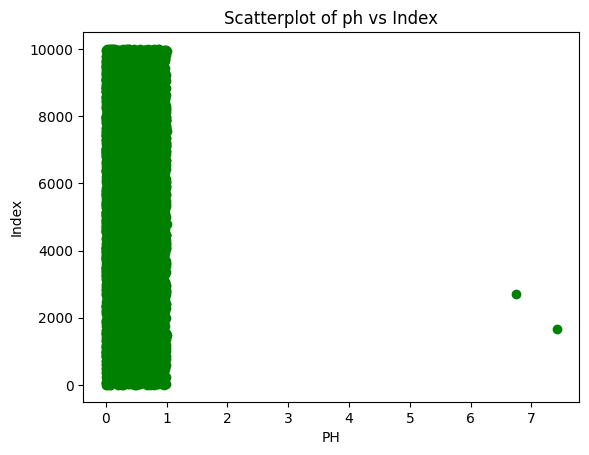

In [144]:
# OUTLIERS

plt.scatter(train_df.ph, train_df.Index, color = 'green')
plt.title('Scatterplot of ph vs Index')
plt.xlabel('PH')
plt.ylabel('Index')
plt.show()


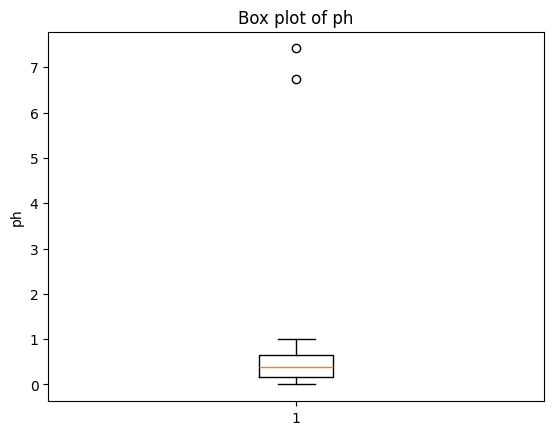

In [145]:
# OUTLIERS
plt.boxplot(train_df.ph)
plt.title('Box plot of ph')
plt.ylabel('ph')
plt.show()

In [146]:
# Detect outliers
Q1 = train_df.ph.quantile(0.25)
Q3 = train_df.ph.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.ph < lower_bound)| (train_df.ph > upper_bound)]
print(outliers.count())
print(outliers)

train_df = train_df[(train_df.ph >= lower_bound) & (train_df.ph <= upper_bound)]
train_df.info()

Index              2
ph                 2
Hardness           2
Solids             2
Chloramines        2
Sulfate            2
Conductivity       2
Organic_carbon     2
Trihalomethanes    2
Turbidity          2
Potability         2
dtype: int64
      Index        ph  Hardness    Solids  Chloramines   Sulfate  \
1656   1656  7.413026  2.136938  2.245851     1.270928  2.316359   
2695   2695  6.739288  2.000747  1.859244     0.988471  1.252809   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1656      3.684186        1.224444         2.502462   1.695033    0.702045  
2695      2.810075        1.270881         2.146343   1.155439    0.883658  
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9998 non-null   int64  
 1   ph               9998 non-null   float64
 2   Hardness         9998 non-nul

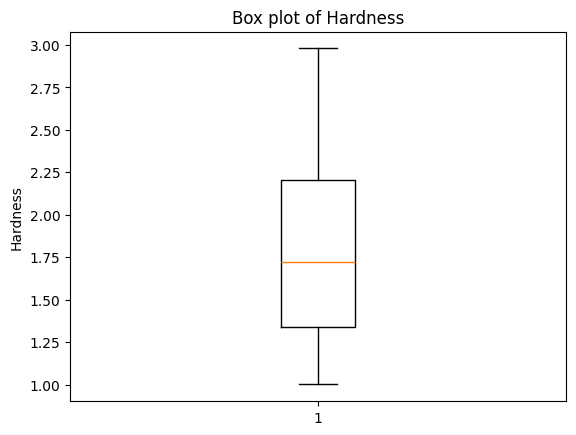

In [147]:
# No outliers
plt.boxplot(train_df.Hardness)
plt.title('Box plot of Hardness')
plt.ylabel('Hardness')
plt.show()

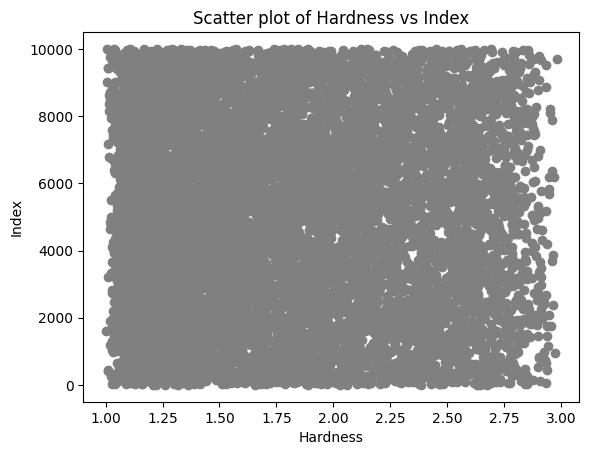

In [148]:
# No outliers
plt.scatter(train_df.Hardness, train_df.Index, color = 'grey')
plt.title('Scatter plot of Hardness vs Index')
plt.xlabel('Hardness')
plt.ylabel('Index')
plt.show()

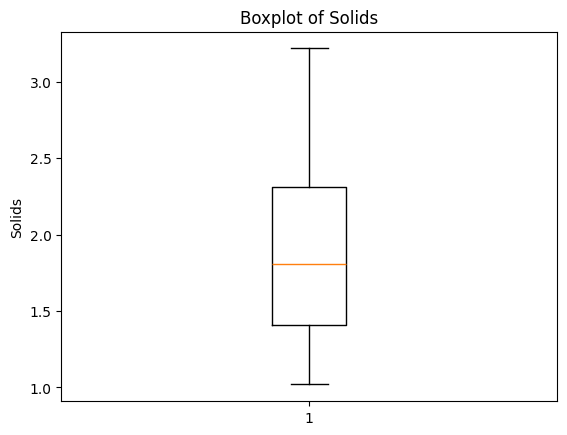

In [149]:
# No outliers
plt.boxplot(train_df.Solids)
plt.title('Boxplot of Solids')
plt.ylabel('Solids')
plt.show()

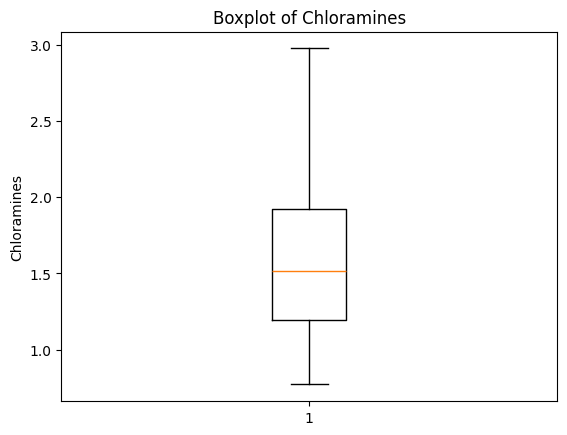

In [150]:
# No outliers
plt.boxplot(train_df.Chloramines)
plt.title('Boxplot of Chloramines')
plt.ylabel('Chloramines')
plt.show()

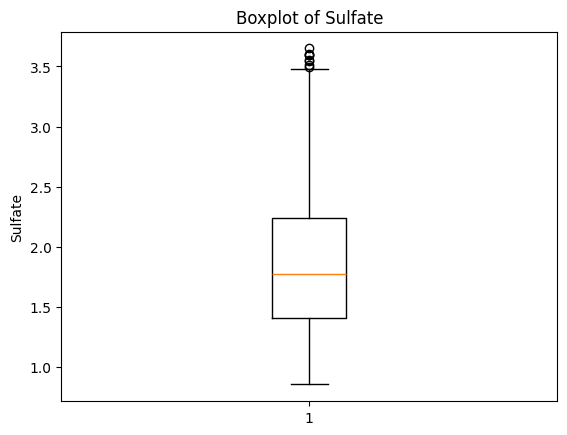

In [151]:
# OUTLIERS
plt.boxplot(train_df.Sulfate)
plt.title('Boxplot of Sulfate')
plt.ylabel('Sulfate')
plt.show()

In [152]:
# Detect outliers
Q1 = train_df.Sulfate.quantile(0.25)
Q3 = train_df.Sulfate.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Sulfate < lower_bound)| (train_df.Sulfate > upper_bound)]
print(outliers.count())
print(outliers.Sulfate)

Index              8
ph                 8
Hardness           8
Solids             8
Chloramines        8
Sulfate            8
Conductivity       8
Organic_carbon     8
Trihalomethanes    8
Turbidity          8
Potability         8
dtype: int64
846     3.599216
1443    3.595795
1939    3.546439
3690    3.513435
3893    3.553438
5155    3.649794
7413    3.607151
9789    3.494065
Name: Sulfate, dtype: float64


In [153]:
# Remove outliers
train_df = train_df[(train_df['Sulfate'] >= lower_bound) & (train_df['Sulfate'] <= upper_bound)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9990 non-null   int64  
 1   ph               9990 non-null   float64
 2   Hardness         9990 non-null   float64
 3   Solids           9990 non-null   float64
 4   Chloramines      9990 non-null   float64
 5   Sulfate          9990 non-null   float64
 6   Conductivity     9990 non-null   float64
 7   Organic_carbon   9990 non-null   float64
 8   Trihalomethanes  9990 non-null   float64
 9   Turbidity        9990 non-null   float64
 10  Potability       9990 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 936.6 KB


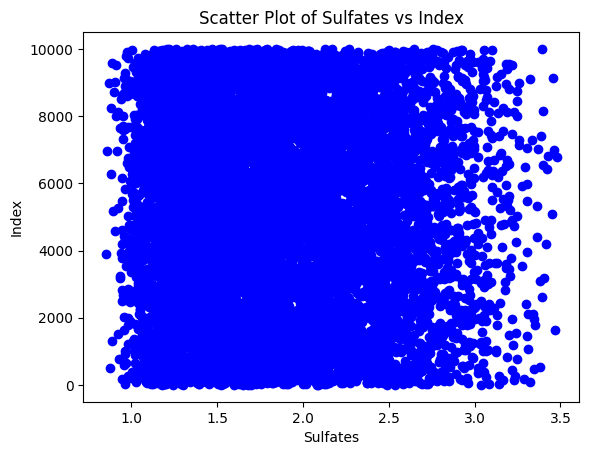

In [154]:
# Draw scatter plot
plt.scatter(train_df.Sulfate, train_df.Index, color = 'blue')
plt.title('Scatter Plot of Sulfates vs Index')
plt.xlabel('Sulfates')
plt.ylabel('Index')
plt.show()

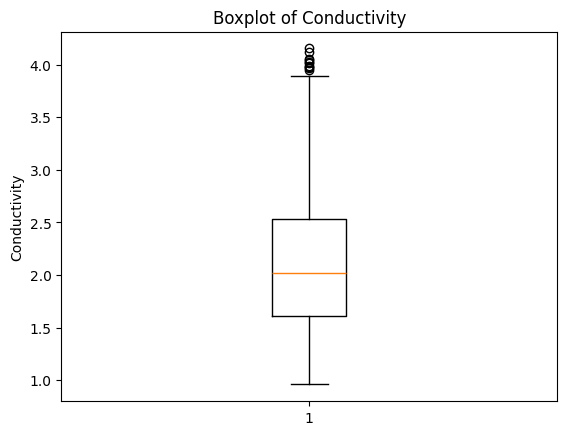

In [155]:
# OUTLIERS
plt.boxplot(train_df.Conductivity)
plt.title('Boxplot of Conductivity')
plt.ylabel('Conductivity')
plt.show()

In [156]:
# Detect outliers
Q1 = train_df.Conductivity.quantile(0.25)
Q3 = train_df.Conductivity.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Conductivity < lower_bound)| (train_df.Conductivity > upper_bound)]
print(outliers.count())
print(outliers)


Index              10
ph                 10
Hardness           10
Solids             10
Chloramines        10
Sulfate            10
Conductivity       10
Organic_carbon     10
Trihalomethanes    10
Turbidity          10
Potability         10
dtype: int64
      Index        ph  Hardness    Solids  Chloramines   Sulfate  \
339     339  0.221901  2.523687  2.700751     1.088928  2.407662   
1709   1709  0.054518  1.990905  2.784933     1.056630  2.089062   
2631   2631  0.073033  1.841648  2.834200     1.070616  2.032628   
2730   2730  0.066592  1.912188  2.756489     1.253490  2.316696   
5452   5452  0.003761  2.570627  2.233867     1.587389  2.494463   
6169   6169  0.337675  2.783267  3.046052     1.666987  2.400482   
6796   6796  0.057645  1.401558  2.718609     0.875520  1.860491   
6867   6867  0.117505  2.522524  2.853131     0.773928  2.172009   
7443   7443  0.056474  2.151990  2.863293     1.455247  1.942760   
8468   8468  0.001176  1.861716  2.459261     0.842488  1.939296 

In [157]:
# Filter the DataFrame to remove outliers
train_df = train_df[(train_df.Conductivity >= lower_bound) & (train_df['Conductivity'] <= upper_bound)]
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9980 non-null   int64  
 1   ph               9980 non-null   float64
 2   Hardness         9980 non-null   float64
 3   Solids           9980 non-null   float64
 4   Chloramines      9980 non-null   float64
 5   Sulfate          9980 non-null   float64
 6   Conductivity     9980 non-null   float64
 7   Organic_carbon   9980 non-null   float64
 8   Trihalomethanes  9980 non-null   float64
 9   Turbidity        9980 non-null   float64
 10  Potability       9980 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 935.6 KB


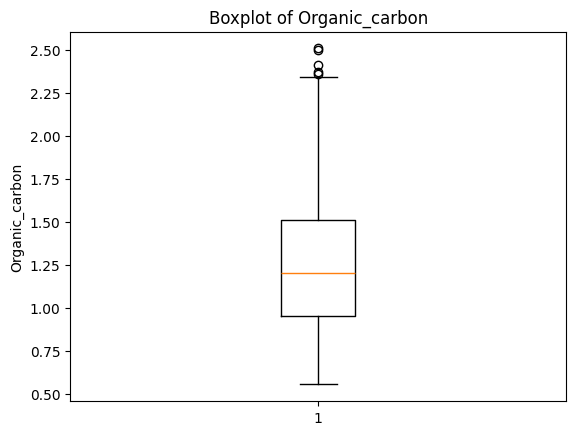

In [158]:
# OUTLIERS
plt.boxplot(train_df.Organic_carbon)
plt.title('Boxplot of Organic_carbon')
plt.ylabel('Organic_carbon')
plt.show()

In [159]:
# Detect Outliers
Q1 = train_df.Organic_carbon.quantile(0.25)
Q3 = train_df.Organic_carbon.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Organic_carbon < lower_bound)| (train_df.Organic_carbon > upper_bound)]
print(outliers.count())

Index              5
ph                 5
Hardness           5
Solids             5
Chloramines        5
Sulfate            5
Conductivity       5
Organic_carbon     5
Trihalomethanes    5
Turbidity          5
Potability         5
dtype: int64


In [160]:
# Filter the DataFrame to remove outliers
train_df = train_df[(train_df.Organic_carbon >= lower_bound) & (train_df.Organic_carbon <= upper_bound)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9975 non-null   int64  
 1   ph               9975 non-null   float64
 2   Hardness         9975 non-null   float64
 3   Solids           9975 non-null   float64
 4   Chloramines      9975 non-null   float64
 5   Sulfate          9975 non-null   float64
 6   Conductivity     9975 non-null   float64
 7   Organic_carbon   9975 non-null   float64
 8   Trihalomethanes  9975 non-null   float64
 9   Turbidity        9975 non-null   float64
 10  Potability       9975 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 935.2 KB


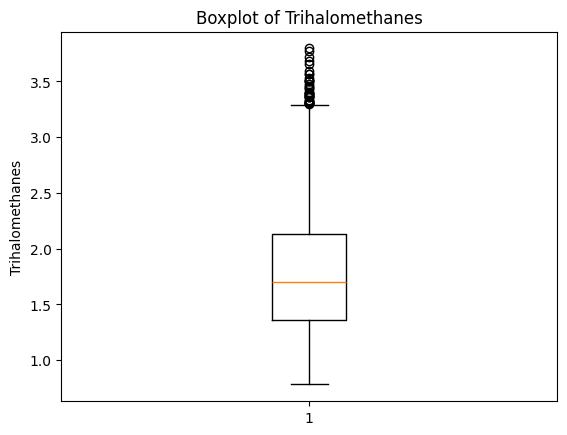

In [161]:
# OUTLIERS
plt.boxplot(train_df.Trihalomethanes)
plt.title('Boxplot of Trihalomethanes')
plt.ylabel('Trihalomethanes')
plt.show()

In [162]:
# Detect outliers
Q1 = train_df.Trihalomethanes.quantile(0.25)
Q3 = train_df.Trihalomethanes.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Trihalomethanes < lower_bound)| (train_df.Trihalomethanes > upper_bound)]
print(outliers.count())

Index              39
ph                 39
Hardness           39
Solids             39
Chloramines        39
Sulfate            39
Conductivity       39
Organic_carbon     39
Trihalomethanes    39
Turbidity          39
Potability         39
dtype: int64


In [163]:
# Filter the DataFrame to remove outliers
train_df = train_df[(train_df['Trihalomethanes'] >= lower_bound) & (train_df['Trihalomethanes'] <= upper_bound)]
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9936 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9936 non-null   int64  
 1   ph               9936 non-null   float64
 2   Hardness         9936 non-null   float64
 3   Solids           9936 non-null   float64
 4   Chloramines      9936 non-null   float64
 5   Sulfate          9936 non-null   float64
 6   Conductivity     9936 non-null   float64
 7   Organic_carbon   9936 non-null   float64
 8   Trihalomethanes  9936 non-null   float64
 9   Turbidity        9936 non-null   float64
 10  Potability       9936 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 931.5 KB


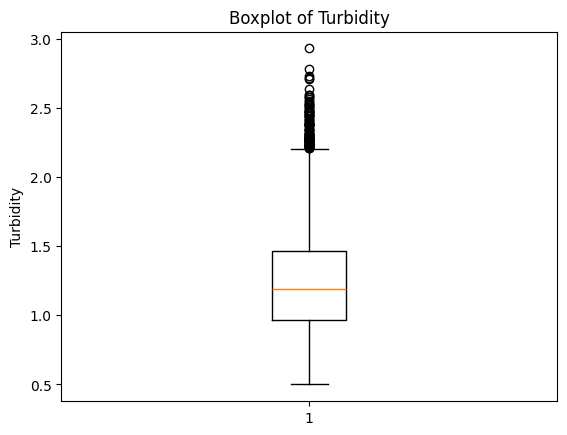

In [164]:
# OUTLIERS
plt.boxplot(train_df.Turbidity)
plt.title('Boxplot of Turbidity')
plt.ylabel('Turbidity')
plt.show()

In [165]:
# Detect Outliers
Q1 = train_df.Turbidity.quantile(0.25)
Q3 = train_df.Turbidity.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Turbidity < lower_bound)| (train_df.Turbidity > upper_bound)]
print(outliers.count())

Index              104
ph                 104
Hardness           104
Solids             104
Chloramines        104
Sulfate            104
Conductivity       104
Organic_carbon     104
Trihalomethanes    104
Turbidity          104
Potability         104
dtype: int64


In [166]:
# Filter the DataFrame to remove outliers
train_df = train_df[(train_df['Turbidity'] >= lower_bound) & (train_df.Turbidity <= upper_bound)]
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9832 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9832 non-null   int64  
 1   ph               9832 non-null   float64
 2   Hardness         9832 non-null   float64
 3   Solids           9832 non-null   float64
 4   Chloramines      9832 non-null   float64
 5   Sulfate          9832 non-null   float64
 6   Conductivity     9832 non-null   float64
 7   Organic_carbon   9832 non-null   float64
 8   Trihalomethanes  9832 non-null   float64
 9   Turbidity        9832 non-null   float64
 10  Potability       9832 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 921.8 KB


In [167]:
# Detect outliers
Q1 = train_df.Potability.quantile(0.25)
Q3 = train_df.Potability.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = train_df[(train_df.Potability < lower_bound)| (train_df.Potability > upper_bound)]
print(outliers.count())


Index              133
ph                 133
Hardness           133
Solids             133
Chloramines        133
Sulfate            133
Conductivity       133
Organic_carbon     133
Trihalomethanes    133
Turbidity          133
Potability         133
dtype: int64


In [168]:
# Filter the DataFrame to remove outliers
train_df = train_df[(train_df['Potability'] >= lower_bound) & (train_df.Potability <= upper_bound)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9699 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9699 non-null   int64  
 1   ph               9699 non-null   float64
 2   Hardness         9699 non-null   float64
 3   Solids           9699 non-null   float64
 4   Chloramines      9699 non-null   float64
 5   Sulfate          9699 non-null   float64
 6   Conductivity     9699 non-null   float64
 7   Organic_carbon   9699 non-null   float64
 8   Trihalomethanes  9699 non-null   float64
 9   Turbidity        9699 non-null   float64
 10  Potability       9699 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 909.3 KB


In [169]:
# Look at the first 5 rows of the test dataset
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.608873,1.252351
1,1,0.012034,2.630323,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,2,0.491167,1.221378,1.438038,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,3,0.486553,1.259134,1.151006,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.515182,0.890722


In [170]:
train_df.describe()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000
mean,4991.950098,0.424319,1.789717,1.882471,1.573127,1.849926,2.112799,1.248259,1.766964,1.226101,0.951054
std,2886.545869,0.285261,0.514803,0.539148,0.455981,0.533382,0.602547,0.359021,0.506246,0.341854,0.262990
min,0.000000,0.000000,1.000769,1.019553,0.774023,0.852042,0.960479,0.554247,0.782468,0.499873,0.367202
25%,2492.500000,0.172976,1.334813,1.407362,1.189765,1.406900,1.616029,0.951133,1.357279,0.960804,0.751514
50%,4990.000000,0.388318,1.716424,1.803909,1.508365,1.777771,2.036197,1.197897,1.698130,1.182255,0.917573
75%,7489.500000,0.659243,2.195694,2.307494,1.912317,2.240499,2.546496,1.507424,2.125069,1.450692,1.121755
max,9999.000000,1.000000,2.979110,3.216966,2.974793,3.477368,3.885879,2.342780,3.290240,2.204248,1.698349


In [171]:
"""train_df['ph_sulfate'] = train_df['ph']*train_df['Sulfate']
train_df['Organic_carbon + Chloramines'] = train_df['Organic_carbon'] + train_df['Chloramines']
train_df['Log_Solids'] = np.log1p(train_df['Solids'])"""


"train_df['ph_sulfate'] = train_df['ph']*train_df['Sulfate']\ntrain_df['Organic_carbon + Chloramines'] = train_df['Organic_carbon'] + train_df['Chloramines']\ntrain_df['Log_Solids'] = np.log1p(train_df['Solids'])"

In [172]:
# Seperate features and labels in the dataset
X = train_df.drop(columns=['Potability', 'Index'])
y = train_df['Potability']
print(X)

            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.264409  2.673538  2.336743     1.431972  1.303685      1.563001   
1     0.012034  2.630323  2.495853     0.911372  1.181754      1.741640   
2     0.491167  1.221378  1.438038     1.506492  1.700871      2.322337   
3     0.486553  1.259134  1.151006     2.658852  3.035266      2.409255   
4     0.075488  1.656818  1.095344     2.169616  1.520531      1.990604   
...        ...       ...       ...          ...       ...           ...   
9995  0.066647  1.291417  1.541680     1.980678  2.129723      1.629682   
9996  0.877900  2.449546  1.389024     1.575261  3.389656      1.808995   
9997  0.054719  1.106346  2.180081     2.346026  1.471835      2.987930   
9998  0.864778  2.560947  1.623588     1.347337  2.646122      1.684377   
9999  0.692718  1.224377  2.754087     1.533567  2.169574      2.990695   

      Organic_carbon  Trihalomethanes  Turbidity  
0           0.697062         2.010126   1.608873

In [173]:
# Split the dataset into train set and validation set
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.2, random_state=42)

"""poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_pf = poly.fit_transform(X_train[['ph', 'Hardness', 'Solids']])
X_val_pf = poly.transform(X_val[['ph', 'Hardness', 'Solids']])"""

"poly = PolynomialFeatures(degree=2, include_bias=False)\nX_train_pf = poly.fit_transform(X_train[['ph', 'Hardness', 'Solids']])\nX_val_pf = poly.transform(X_val[['ph', 'Hardness', 'Solids']])"

In [174]:
#correlation = X_train_pf.corr()
"""tt = pd.DataFrame(X_train_pf)
tt.shape
tt.head()"""

'tt = pd.DataFrame(X_train_pf)\ntt.shape\ntt.head()'

In [175]:
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.608873,1.252351
1,1,0.012034,2.630323,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,2,0.491167,1.221378,1.438038,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,3,0.486553,1.259134,1.151006,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.515182,0.890722


                    Index        ph  Hardness    Solids  Chloramines  \
Index            1.000000  0.011159  0.007545  0.001228    -0.009961   
ph               0.011159  1.000000  0.096767  0.118519     0.220663   
Hardness         0.007545  0.096767  1.000000  0.105336    -0.211147   
Solids           0.001228  0.118519  0.105336  1.000000    -0.106989   
Chloramines     -0.009961  0.220663 -0.211147 -0.106989     1.000000   
Sulfate         -0.003714  0.191281  0.200166 -0.204436     0.108358   
Conductivity    -0.003513 -0.120019  0.120938  0.277328    -0.088178   
Organic_carbon  -0.002652 -0.206073 -0.297902 -0.202801     0.081621   
Trihalomethanes -0.003754 -0.296833 -0.087555  0.087205    -0.106244   
Turbidity       -0.015253 -0.277344  0.105527  0.009813     0.169211   
Potability       0.010419 -0.379346  0.079469 -0.018560     0.078962   

                  Sulfate  Conductivity  Organic_carbon  Trihalomethanes  \
Index           -0.003714     -0.003513       -0.002652    

<Axes: >

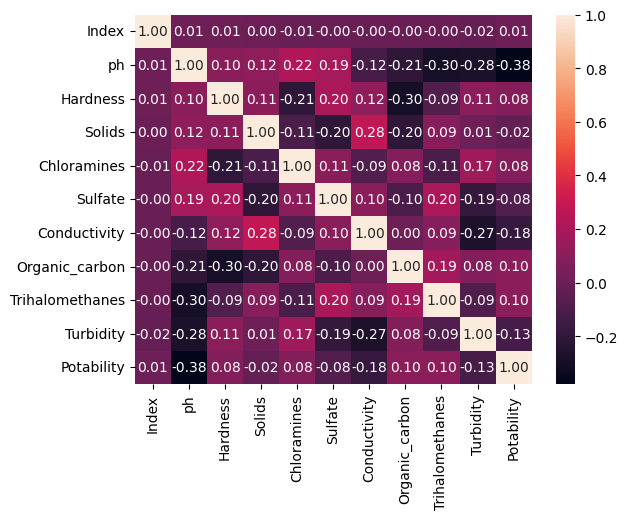

In [176]:
# Find the correlation among different columns of the dataset
correlation = train_df.corr()
print(correlation)
print(correlation['Potability'])

# Draw heatmap for correlation
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

# All features are important

In [177]:
"""from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
#Apply StandardScaler to the features
train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = standard_scaler.fit_transform(
    train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])

"""

"from sklearn.preprocessing import StandardScaler\n\nstandard_scaler = StandardScaler()\n#Apply StandardScaler to the features\ntrain_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = standard_scaler.fit_transform(\n    train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])\n\n"

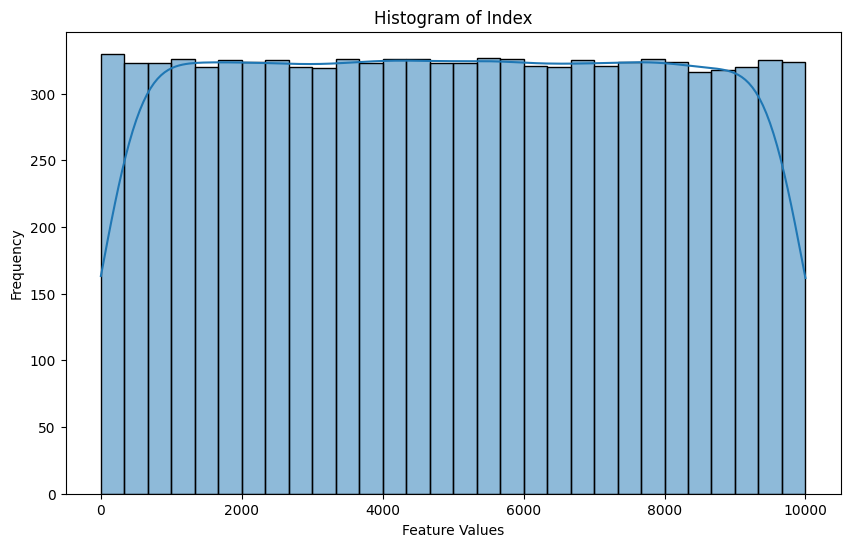

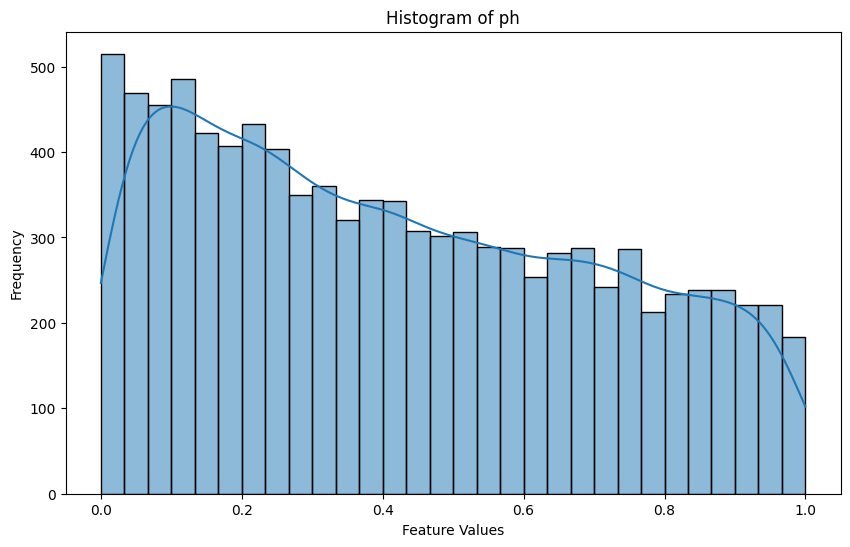

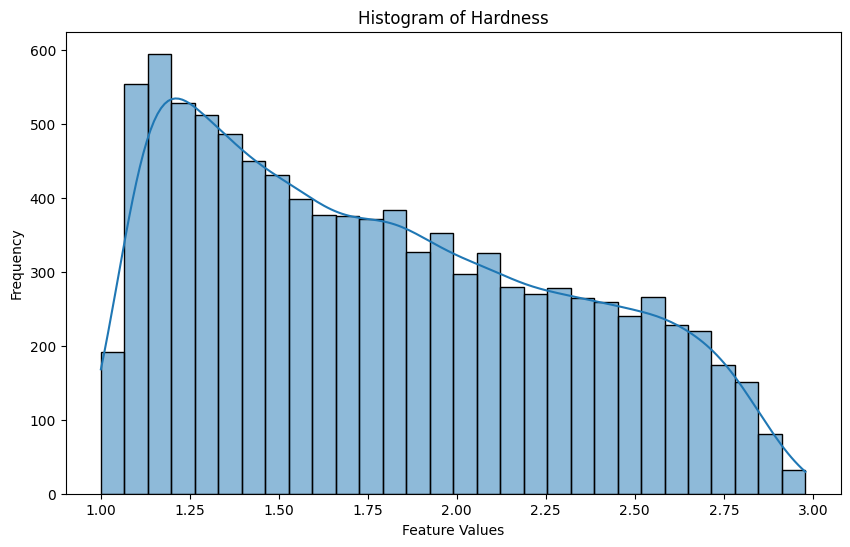

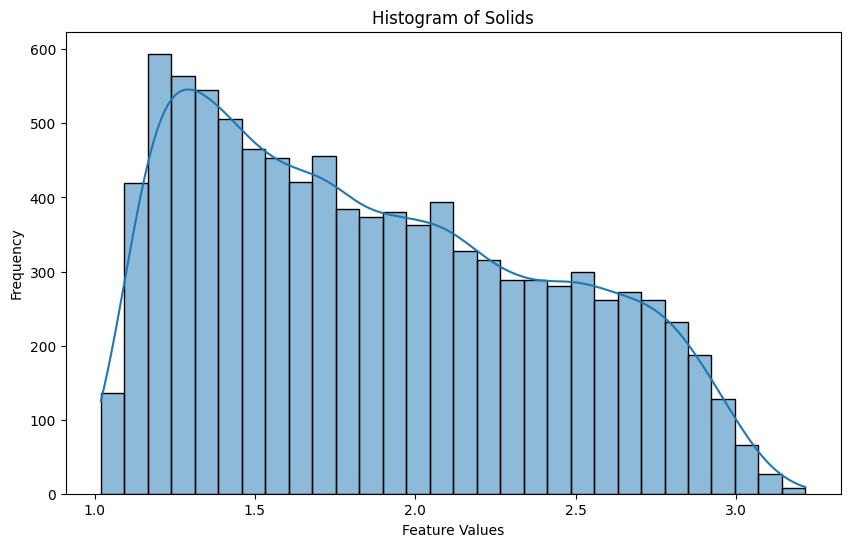

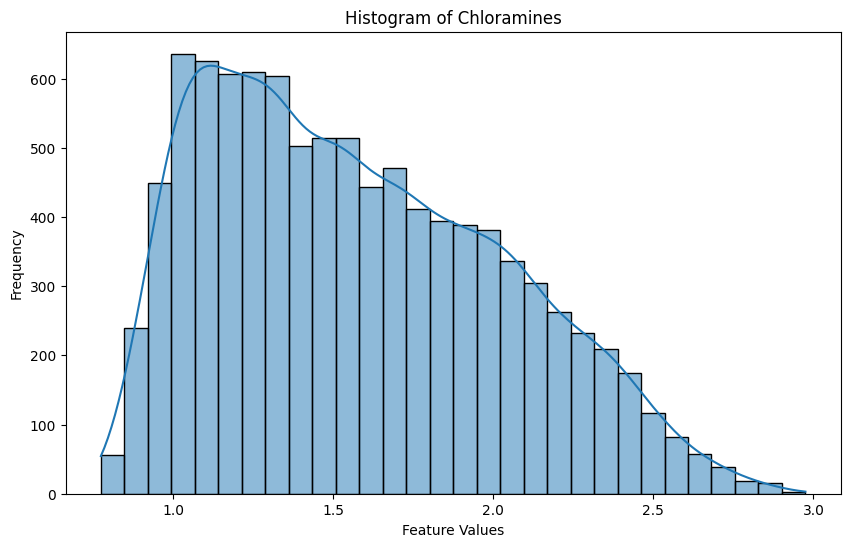

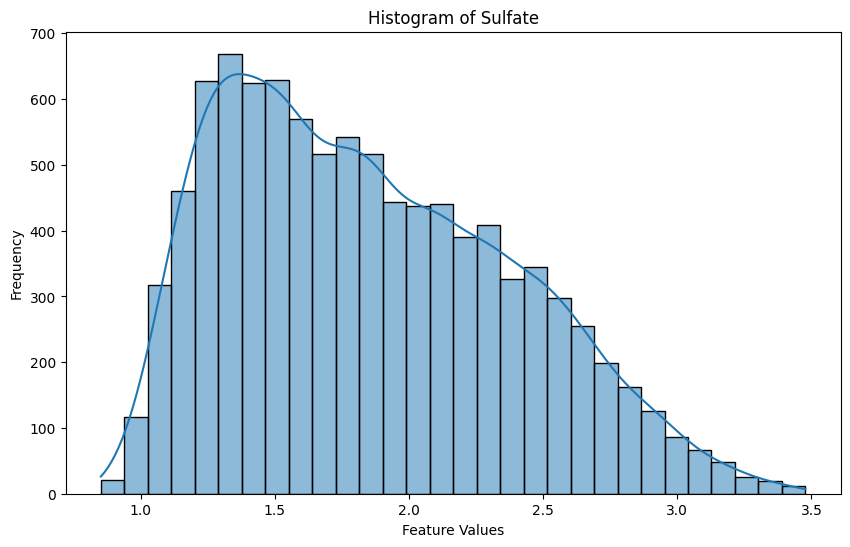

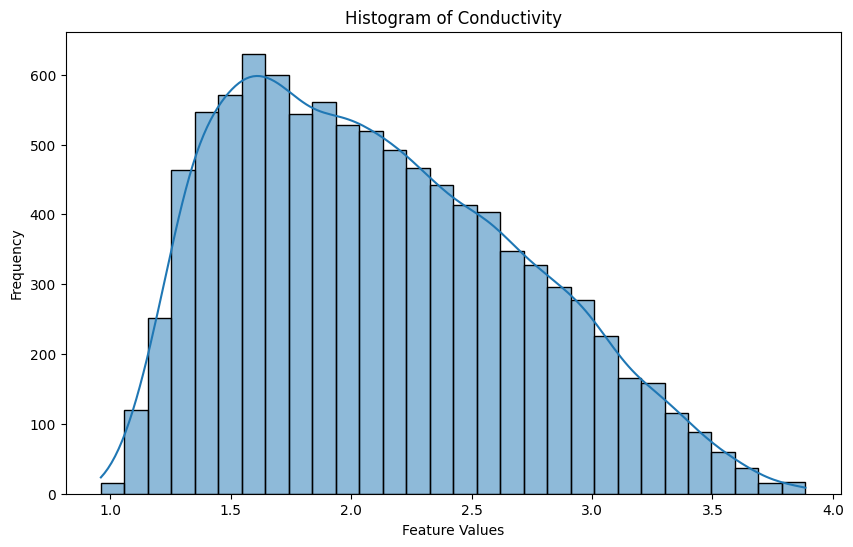

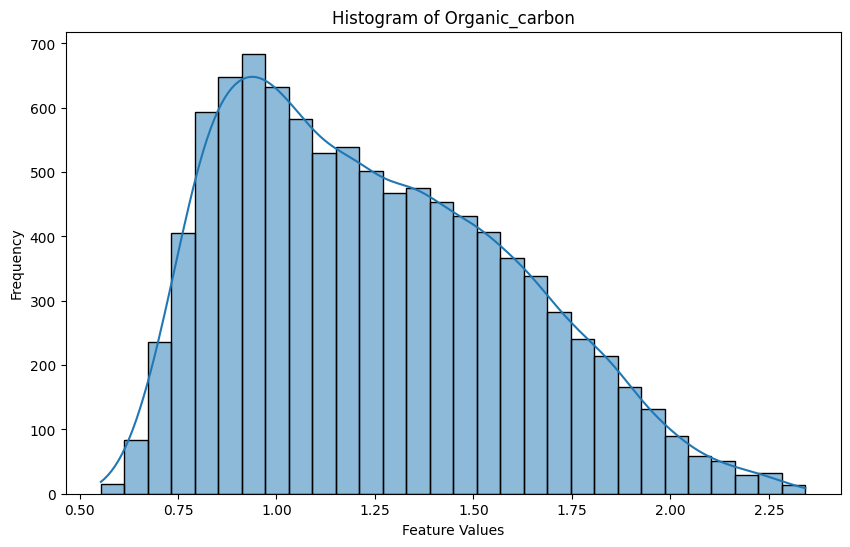

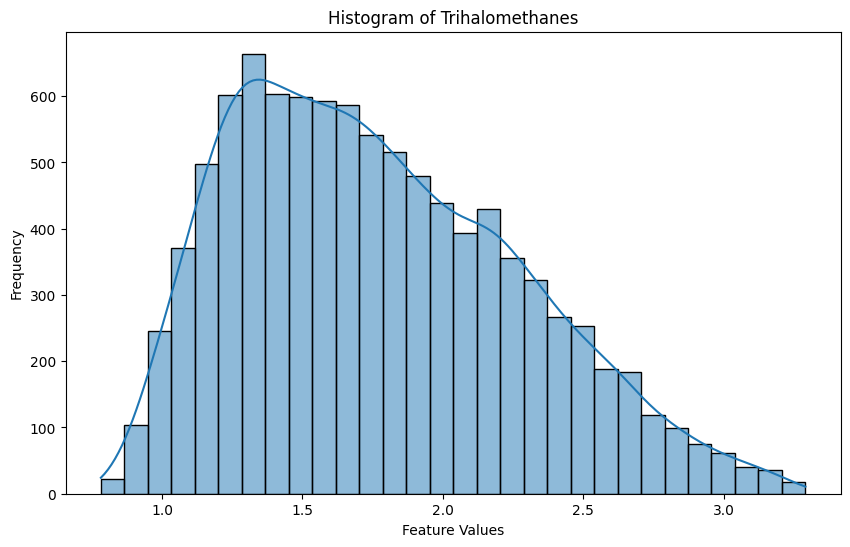

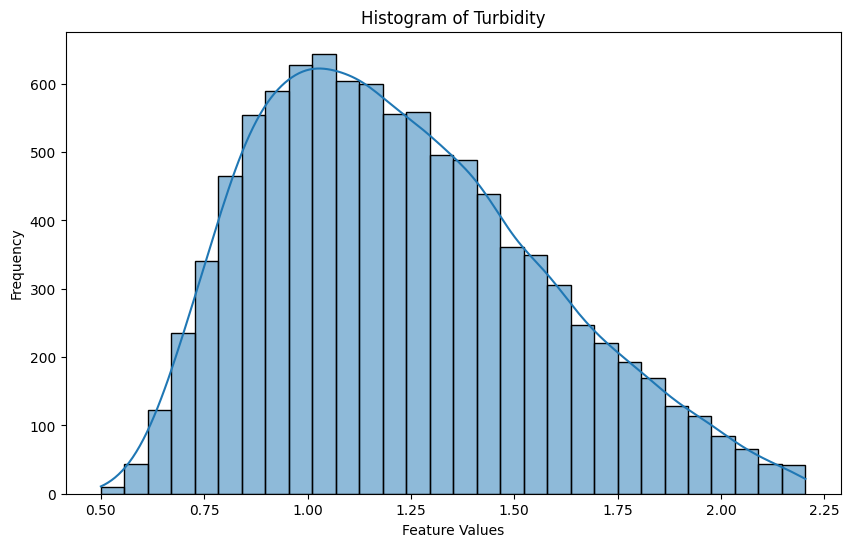

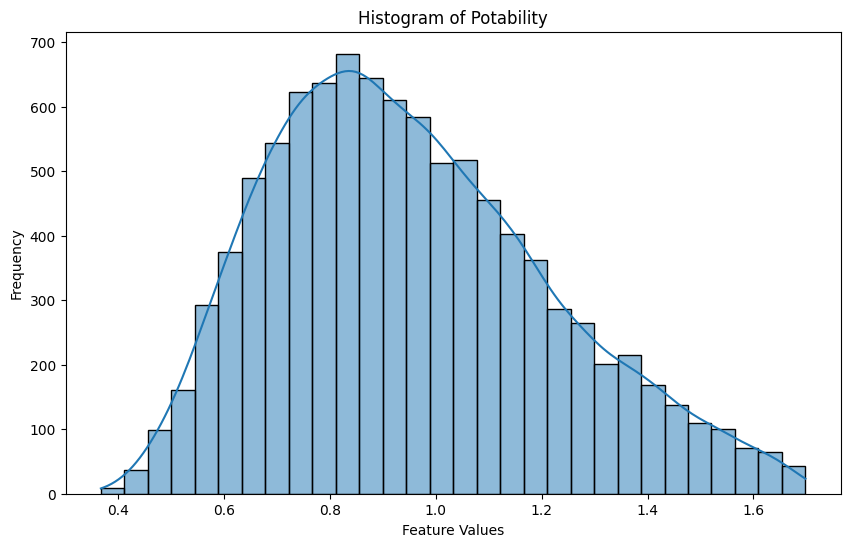

In [178]:
# Look at the distribution of the data in different columns and check for skewness
for feature in train_df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(train_df[feature], kde=True, bins=30)
  plt.title(f'Histogram of {feature}')
  plt.xlabel('Feature Values')
  plt.ylabel('Frequency')
  plt.show()

In [179]:
# Apply logarithm to the features of the train set where there is skewness
train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = np.log1p(train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])


In [180]:
"""from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = mms.fit_transform(train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])"""

"from sklearn.preprocessing import MinMaxScaler\nmms = MinMaxScaler()\ntrain_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = mms.fit_transform(train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])"

In [181]:
"""for feature in train_df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(train_df[feature], kde=True, bins=30)
  plt.title(f'Histogram of {feature}')
  plt.xlabel('Feature Values')
  plt.ylabel('Frequency')
  plt.show()"""

"for feature in train_df.columns:\n  plt.figure(figsize=(10, 6))\n  sns.histplot(train_df[feature], kde=True, bins=30)\n  plt.title(f'Histogram of {feature}')\n  plt.xlabel('Feature Values')\n  plt.ylabel('Frequency')\n  plt.show()"

In [182]:
# Start training the different regression models on the training data and evaluate the accuracy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso


from sklearn.metrics import median_absolute_error




models = [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(random_state=42), DecisionTreeRegressor(random_state=42), SVR(), KNeighborsRegressor()]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  y_train_pred = model.predict(X_train)

  mae = median_absolute_error(y_val, y_pred)
  mae2 = median_absolute_error(y_train, y_train_pred)
  score = max(0, 100 * (1 - mae))
  score2 = max(0, 100 * (1-mae2))

  print(f"Validation Score for {model}: {score:.2f}")
  print(f"Training Score for {model}: {score2: .2f}")


Validation Score for LinearRegression(): 85.45
Training Score for LinearRegression():  85.43
Validation Score for Ridge(): 85.46
Training Score for Ridge():  85.43
Validation Score for Lasso(): 81.09
Training Score for Lasso():  81.27
Validation Score for RandomForestRegressor(random_state=42): 85.71
Training Score for RandomForestRegressor(random_state=42):  94.66
Validation Score for DecisionTreeRegressor(random_state=42): 82.34
Training Score for DecisionTreeRegressor(random_state=42):  100.00
Validation Score for SVR(): 86.21
Training Score for SVR():  86.84
Validation Score for KNeighborsRegressor(): 83.81
Training Score for KNeighborsRegressor():  87.43


In [183]:
"""# Tuning hyperparameters of SVR()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR()

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)


# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)
"""

'# Tuning hyperparameters of SVR()\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import RandomizedSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1],\n    \'kernel\': [\'linear\', \'poly\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\'],\n    \'epsilon\': [0.1, 0.2, 0.5]\n}\n\nsvr = SVR()\n\n# Grid Search for hyperparameter tuning\ngrid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\', verbose=2)\ngrid_search.fit(X_train, y_train)\n\n\n# Get the best parameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n'

In [184]:
"""# Get the best model
best_svr = grid_search.best_estimator_

# Make predictions
y_pred = best_svr.predict(X_val)
y_train_pred = best_svr.predict(X_train)

# Evaluate performance
mae = median_absolute_error(y_val, y_pred)
mae2 = median_absolute_error(y_train, y_train_pred)
test_score = max(0, 100 * (1 - mae))
train_score = max(0,100*(1-mae2))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")"""

Train Score: 85.40122577591829
Test Score: 85.85670138309342


In [185]:
# Try XGBoost ensemble model

import xgboost as xgb
# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = xgb_model.predict(X_val)
y_train_pred = xgb_model.predict(X_train)

# Evaluate performance
mae = median_absolute_error(y_val, y_pred)
mae2 = median_absolute_error(y_train, y_train_pred)
test_score = max(0, 100 * (1 - mae))
train_score = max(0,100*(1-mae2))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Train Score: 86.30733529162482
Test Score: 85.57862418497496


In [186]:
# Apply necessary  preprocessing steps in the test set similar to the train test
test_df.head()

test_df['ph'] = test_df['ph'].apply(lambda x : re.search('\d+\.\d+', x).group())
test_df.ph= test_df.ph.astype('float')

test_df['Hardness'] = test_df['Hardness'].apply(lambda x : re.search('\d+\.\d+', x).group())
test_df.Hardness= test_df.Hardness.astype('float')

test_df['Solids'] = test_df['Solids'].apply(lambda x : re.search('\d+\.\d+', x).group())
test_df.Solids=test_df.Solids.astype('float')

test_df['Turbidity'] = test_df['Turbidity'].apply(lambda x : re.search('\d+\.\d+', x).group())
test_df.Turbidity=test_df.Turbidity.astype('float')

test_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = np.log1p(test_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']])

test_df.head()



,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,10000,0.377289,1.026165,0.945434,0.932511,0.978167,1.149552,0.980240,1.133155,0.683580
1,10001,0.006145,1.217792,0.867597,0.800126,0.841841,1.179196,0.847266,0.908564,0.917307
2,10002,0.520096,0.878808,1.110569,1.232593,0.778691,0.961017,0.636948,1.038257,0.750810
3,10003,0.446494,1.042737,1.259892,1.068436,1.316835,0.965502,0.537633,1.280407,0.983807
4,10004,0.289787,0.920480,1.205530,1.078467,0.819714,1.041141,0.666681,0.718825,0.716242


In [187]:
# Predict scores of test dataset
test_df = test_df.drop('Index', axis = 1)
test_pred = xgb_model.predict(test_df)

In [188]:
# Create submission file for the test predictions

submission = pd.DataFrame({'Index': np.arange(10000, 15000), 'Potability' : test_pred})
submission.to_csv('submission.csv', index = False)


In [189]:
s = pd.read_csv('/content/submission.csv')

In [190]:
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
import numpy as np

def evaluate_regression_model(model, X, y, n_splits=5):

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kfold.split(X):
        # Split data
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        # Fit model
        model.fit(X_train, y_train)

        # Predict and compute custom score
        y_pred = model.predict(X_val)
        mae = median_absolute_error(y_val, y_pred)
        score = max(0, 100 * (1 - mae))
        scores.append(score)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    return mean_score, std_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}

# Evaluate Each Model
for model_name, model in models.items():
    mean_score, std_score = evaluate_regression_model(model, X, y)
    print(f"{model_name} -> Mean Score: {mean_score:.2f}")

Linear Regression -> Mean Score: 85.43
Ridge Regression -> Mean Score: 85.44
Lasso Regression -> Mean Score: 81.22
Random Forest -> Mean Score: 85.30
Decision Tree -> Mean Score: 82.05
Support Vector Regression (SVR) -> Mean Score: 85.77
K-Nearest Neighbors -> Mean Score: 84.27
